In [1]:
import numpy as np

Izracunati gradijente funkcija:
<br><br>
a) $f(x_1, x_2) = \frac{1}{2}(x_1^2 + 10x_2^2)$
<br><br>
b) $f(x) = x^2 -4x +4$

Racunamo izvode za funkcije.

a) $f(x_1, x_2) = \frac{1}{2}x_1^2 + 5x_2^2$

Odnosno:

$f'(x_1, x_2) = x_1 + 10x_2$

$\nabla f(x_1, x_2) = (x_1, 10x_2)$

b) $f(x) = x^2 -4x +4$

$\nabla f(x) = (2x - 4)$

In [2]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 0.5*(x1**2 + 10*x2**2)

In [3]:
def grad(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1, 10*x2])

### Gradijentni spust

$x_0$ proizvoljno odabrana tacka
<br>
$x_{k+1} = x_k - \alpha\nabla f(x_k)$ za $k=0,1,...$,  

In [4]:
def gradient_descent(f, grad, x, alpha, eps, max_iterations):
    result = {}
    
    x_old = x 
    for i in range(max_iterations):
        x_new = x_old - alpha*grad(x_old)
        if np.abs(f(x_new)-f(x_old))<eps:
            break;
        x_old = x_new
    
    result['converge'] = i != max_iterations-1
    result['number_of_iterations'] = i
    result['x_min'] = x_old
    
    return result

In [5]:
x0 = (3, 5)
alpha = 0.1 
eps = 0.01 
max_iterations = 1000

In [6]:
gd_result = gradient_descent(f, grad, x0, alpha, eps, max_iterations)

In [7]:
gd_result

{'converge': True,
 'number_of_iterations': 22,
 'x_min': array([0.29543127, 0.        ])}

Kako se menja konvergencija ukoliko se za korak ucenja u k-tom koraku uzimaju vrednosti $\alpha_k=\frac{1}{k}$?

### Metod inercije

Inicijalizacija:  $d_0 = 0$, $0<= \beta < 1$ 
<br><br>
$d_{k+1} = \beta_{k}d_{k} + \alpha\nabla f(x_{k})$
<br><br>
$x_{k+1} = x_{k} - d_{k+1}$


In [8]:
def inertion(f, grad, x0, alpha, beta, eps, max_iterations):
    result = {}
    d = 0
    
    x_old = x0
    for i in range(max_iterations):
        d = beta*d + alpha*grad(x_old)
        x_new = x_old - d
        if np.abs(f(x_new)-f(x_old))<eps:
            break;
        x_old = x_new
    
    result['converge'] = i != max_iterations-1
    result['number_of_iterations'] = i
    result['x_min'] = x_old
    
    return result

In [9]:
x0 = (3, 5)
alpha = 0.1 
beta = 0.1
eps = 0.01 
max_iterations = 1000

In [10]:
i_result = inertion(f, grad, x0, alpha, beta, eps, max_iterations)

In [11]:
print(i_result)

{'converge': True, 'number_of_iterations': 20, 'x_min': array([ 2.78983353e-01, -5.02433416e-10])}


### ADAM (Adaptive moment estimation)
<br>
Referentni rad: https://arxiv.org/pdf/1412.6980.pdf

Inicijalizacija: $k=0$, $m_0 =0$, $v_0 = 0$
<br> <br> 
$m_{k+1} = \beta_1 m_{k} + (1-\beta_1)\nabla f(x_k)$
<br> <br>
$v_{k+1} = \beta_2 v_{k} + (1-\beta_2)\nabla f(x_k)^2$
<br> <br>
$\hat{m_{k+1}} = \frac{m_{k+1}}{1-{\beta_1}^{k+1}}$
<br> <br>
$\hat{v_{k+1}} = \frac{v_{k+1}}{1-{\beta_2}^{k+1}}$
<br> <br>
$x_{k+1} = x_{k} - \alpha \frac{\hat{m_{k+1}}}{\sqrt{\hat{v_{k+1}}} + eps}$
<br>


In [12]:
def adam(f, grad, x0, alpha, beta1, beta2, eps, max_iterations, precision):
    result = {}
    m = 0
    v = 0
    
    x_old = x0
    for k in range(1, max_iterations + 1):
        m = beta1 * m + (1 - beta1) * grad(x_old)
        v = beta2 * v + (1 - beta2) * (grad(x_old) * grad(x_old))
        
        m_hat = m / (1 - beta1 ** k)
        v_hat = v / (1 - beta2 ** k)
        
        x_new = x_old - (alpha * m_hat) / (np.sqrt(v_hat) + eps)
        if np.abs(f(x_new) - f(x_old)) < precision:
            break;
        x_old = x_new
    
    result['converge'] = k != max_iterations
    result['number_of_iterations'] = k
    result['x_min'] = x_old
    
    return result

Predlozene vrednosti: $\alpha = 1$, $\beta_1=0.9$, $\beta_2 = 0.999$, $eps = 1e-8$
<br>
Zaustavni kriterijum: kada je rastojanje izmedju $x_{k+1}$ i $x_{k}$ dovoljno malo (precision = 0.001)

In [13]:
alpha = 1
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

In [14]:
a_result = adam(f, grad, x0, alpha, beta1, beta2, eps, max_iterations, 0.001)

In [15]:
a_result

{'converge': True,
 'number_of_iterations': 76,
 'x_min': array([-0.02340247,  0.01529523])}

In [16]:
x = np.array([1, 2])
print(x*x)
print(np.linalg.norm(x)**2)

[1 4]
5.000000000000001


In [17]:
print(gd_result)
print(i_result)
print(a_result)

gd_x = gd_result['x_min']
i_x = i_result['x_min']
a_x = a_result['x_min']

{'converge': True, 'number_of_iterations': 22, 'x_min': array([0.29543127, 0.        ])}
{'converge': True, 'number_of_iterations': 20, 'x_min': array([ 2.78983353e-01, -5.02433416e-10])}
{'converge': True, 'number_of_iterations': 76, 'x_min': array([-0.02340247,  0.01529523])}


Nacrtajte grafik na kojem su vizualizovana pronadjena resenja za vektor x,
odnosno na x osi je vrednost $x_1$, na y osi je vrednost $x_2$, a tri dobijena
vektora (primenom razlicitih algoritama optimizacije) su oznacena razlicitim bojama
i prikazana u legendi.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

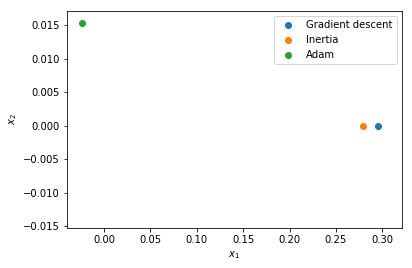

In [19]:
plt.scatter(gd_x[0], gd_x[1])
plt.scatter(i_x[0], i_x[1])
plt.scatter(a_x[0], a_x[1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(['Gradient descent', 'Inertia', 'Adam'])

Nacrtajte bar plot koji vizualizuje 3 pronadjena minimuma funkcije $f$.
Vrednost koju je pronasao:
- Gradijentni spust obojiti u crveno
- Metod inercije obojiti u zuto
- Adam obojiti u zeleno

Na x osi umesto brojeva postaviti imena opt. algoritama, a na y osi
napisati $f(x_1, x_2)$.

([<matplotlib.axis.XTick at 0x7f3f2ae5dcc0>,
 <a list of 3 Text xticklabel objects>)

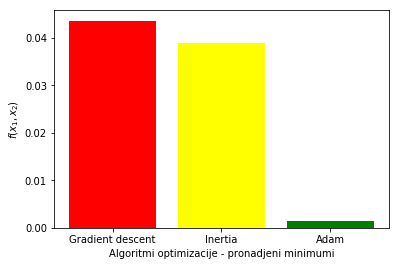

In [20]:
plt.bar([0, 1, 2], [f(gd_x), f(i_x), f(a_x)], color=['red', 'yellow', 'green'])
plt.xlabel('Algoritmi optimizacije - pronadjeni minimumi')
plt.ylabel('$f(x_1, x_2)$')
plt.xticks([0, 1, 2], ['Gradient descent', 'Inertia', 'Adam'])